In [136]:
"""
Universidade Federal de Pernambuco – CIn
Pós-graduação em Ciência da Computação
Disciplina: Aprendizagem de Máquina 
Professor: Leandro Maciel Almeida
Estudantes: Carlos Antônio Alves Junior,
            Matheus Johann Araújo e
            Marcos de Souza Oliveira.           
Atividade: Missão 05 - SVM

--------------
Referências:
    https://scikit-learn.org/stable/modules/svm.html
    https://scikit-learn.org/stable/modules/multiclass.html
    https://scikit-learn.org/stable/modules/preprocessing.html
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html
    https://archive.ics.uci.edu/ml/datasets/glass+identification
    https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
    https://www.youtube.com/watch?v=Zj1CoJk2feE
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [137]:
# Lendo dados
dataset_df = pd.read_csv('./glass.data')
dataset_df.columns = ['ID', 'RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE', 'class']

# Limpando dados
dataset_df = dataset_df.dropna()

# Removendo coluna ID
dataset_df = dataset_df.drop('ID', 1)

dataset_df:
           RI     NA    MG    AL     SI     K    CA    BA   FE  class
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0      1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0      1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0      1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0      1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0      1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...    ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0      7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0      7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0      7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0      7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0      7

[214 rows x 10 columns]


c:\program files\python36\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


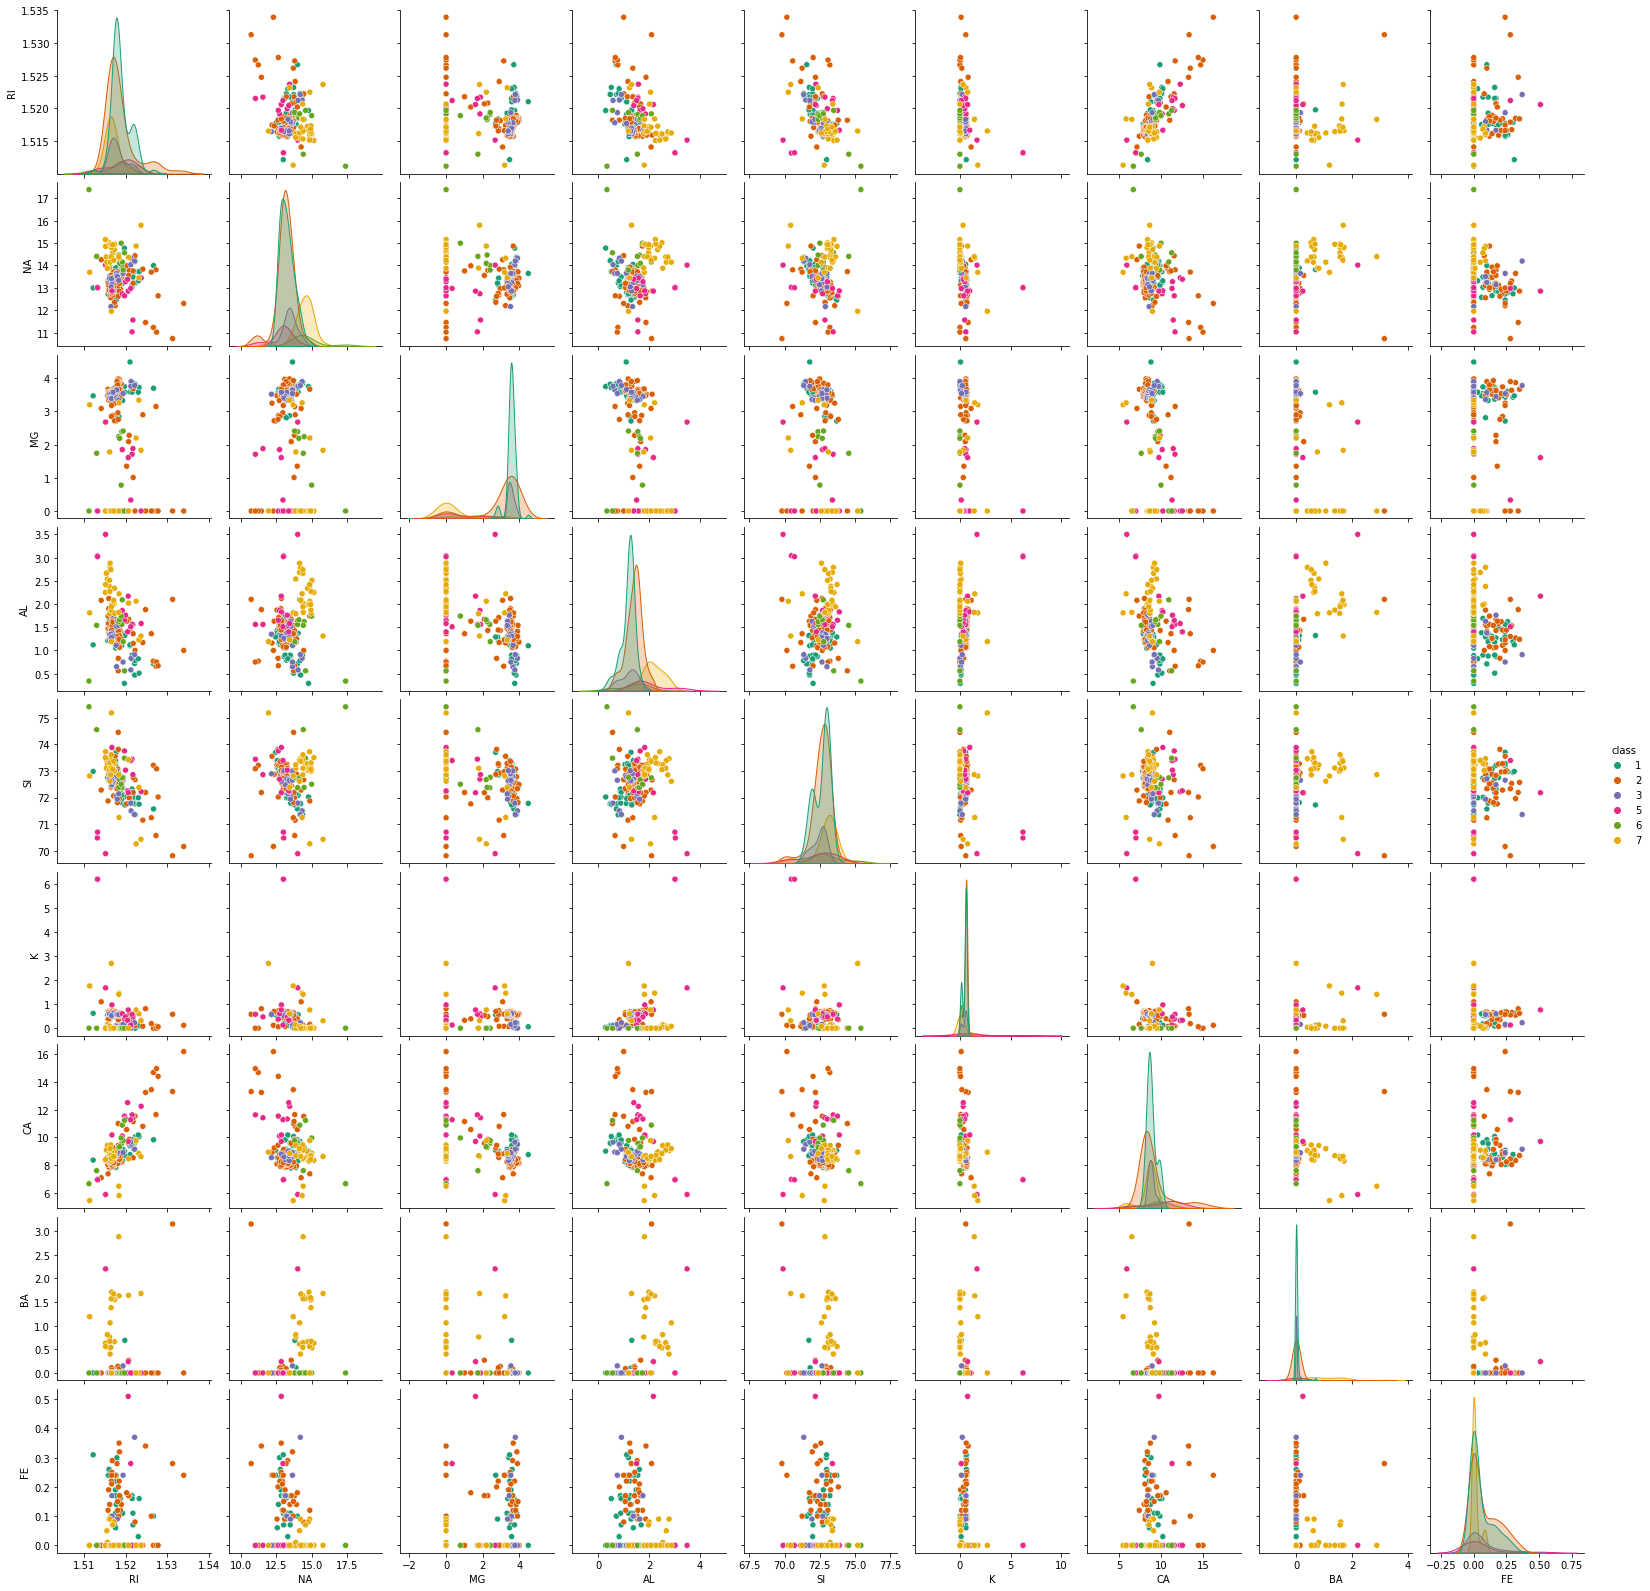

Index(['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE', 'class'], dtype='object')


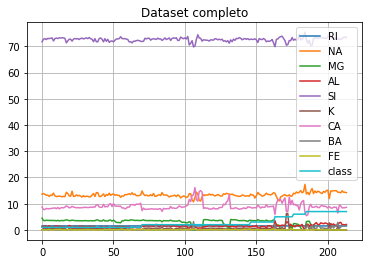

In [138]:
# Exibindo datataset
print(f'dataset_df:\r\n {dataset_df}')
sns.pairplot(dataset_df, hue='class', palette='Dark2')
plt.show()

# Exibindo colunas
print(dataset_df.columns)
dataset_df.plot(kind='line', grid=True, title='Dataset completo')
plt.show()

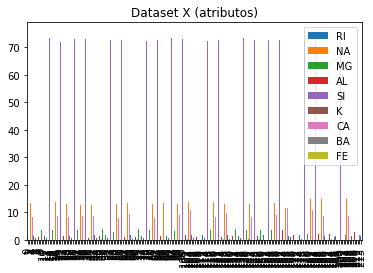

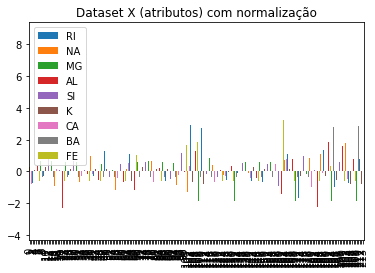

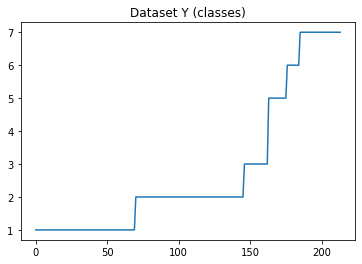

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


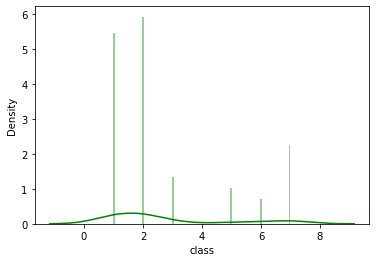

X (atributos):
           RI        NA        MG        AL        SI         K        CA  \
0    0.870826  0.284287  1.251704 -0.690822 -1.124446 -0.670134 -0.145425   
1   -0.248750  0.590433  0.634680 -0.170061  0.102080 -0.026152 -0.791877   
2   -0.719631  0.149582  0.600016  0.190465  0.437760 -0.164148 -0.827010   
3   -0.232286 -0.242285  0.697076 -0.310266 -0.052850  0.111844 -0.517838   
4   -0.311315 -0.168810  0.648546 -0.410413  0.553957  0.081178 -0.623237   
..        ...       ...       ...       ...       ...       ...       ...   
209 -0.703166  0.896579 -1.861147  2.874386 -0.052850 -0.639468  0.156721   
210 -0.499008  1.851755 -1.861147  1.091782  0.528136 -0.762132 -0.391358   
211  0.752282  1.165987 -1.861147  1.151869  0.992924 -0.762132 -0.363251   
212 -0.610966  1.190479 -1.861147  0.991635  1.238229 -0.762132 -0.335145   
213 -0.413394  1.006792 -1.861147  1.272045  0.915460 -0.762132 -0.236772   

           BA        FE  
0   -0.352051 -0.585079  
1   -0.3

In [139]:
def mean_norm(df_input):
  return df_input.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# X só atributos
x = dataset_df.drop('class', 1)
x.plot(kind='bar', title='Dataset X (atributos)')
plt.show()

# Normalizando os atributos
x = mean_norm(x)
x.plot(kind='bar', title='Dataset X (atributos) com normalização')
plt.show()

# Y só as classes (target)
y = dataset_df['class']
# Plot das Classes em gráfico de linhas
y.plot(kind='line', title='Dataset Y (classes)')
plt.show()

# Distâncias entre as classes
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

# Exibindo dados
print(f'X (atributos):\r\n{x}\r\n{"-"*62}\r\nY (classes):\r\n{y}')

In [140]:
# A function which returns the corresponding SVC model
# Kernels: poly = 0, rbf = 1, sigmoid = 2, linear = 3
def getClassifier(ktype):
  # Polynomial kernal
  if ktype == 0 or ktype == 'poly':  
    return svm.SVC(kernel='poly', degree=8, gamma="auto")
  # Radial Basis Function kernal
  elif ktype == 1 or ktype == 'rbf':  
    return svm.SVC(kernel='rbf', gamma="auto")
  # Sigmoid kernal
  elif ktype == 2 or ktype == 'sigmoid':  
    return svm.SVC(kernel='sigmoid', gamma="auto")
  # Linear kernal
  elif ktype == 3 or ktype == 'linear':  
    return svm.SVC(kernel='linear', gamma="auto")

# SVM get Accuracy Score and Best Params
def getAccuracyScoreAndBestParams(x, y, kernel, svclassifier = None, test_size=0.20, random_state=40, verbose=1):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    # Set svclassifier
    if svclassifier == None:
        svclassifier = getClassifier(kernel)
    # Make prediction
    svclassifier.fit(X_train, y_train)
    # Evaluate our model
    y_pred = svclassifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': [kernel]
    }
    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=verbose)
    grid.fit(X_train, y_train)
    #be = grid.best_estimator_
    bp = grid.best_params_
    grid_predictions = grid.predict(X_test)
    print(f'Accuracy Score ({kernel}): {acc}')
    #print(f'Grid Best Estimator: {be}')
    print(f'Grid Best Params: {bp}')
    if verbose == 2:
        print(f'Confusion Matrix:\r\n{confusion_matrix(y_test, grid_predictions)}')
        print(f'Classification Report:\r\n{classification_report(y_test, grid_predictions)}')
    print()
    return {'acc': acc, 'bp': bp}


In [141]:
# Seleção dos melhores hiperparâmetros para cada Kernel svm.SVC
sel_poly = getAccuracyScoreAndBestParams(x, y, 'poly')['bp']
sel_rbf = getAccuracyScoreAndBestParams(x, y, 'rbf')['bp']
sel_sigmoid = getAccuracyScoreAndBestParams(x, y, 'sigmoid')['bp']
sel_linear = getAccuracyScoreAndBestParams(x, y, 'linear')['bp']

# Separação dos conjuntos de dados
# Train = 60% | Temp Test = 40%
x_train, x_temp_test, y_train, y_temp_test = train_test_split(x, y, test_size=0.4, random_state=40)
# Test = 50% | Valid  = 50%
x_valid, x_test, y_valid, y_test = train_test_split(x_temp_test, y_temp_test, test_size=0.5, random_state=40)

print(f'shape train X, Y: {x_train.shape}, {y_train.shape}')
print(f'shape valid X, Y: {x_valid.shape}, {y_valid.shape}')
print(f'shape test X, Y: {x_test.shape}, {y_test.shape}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (poly): 0.3953488372093023
Grid Best Params: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (rbf): 0.7441860465116279
Grid Best Params: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (sigmoid): 0.4883720930232558
Grid Best Params: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy Score (linear): 0.5813953488372093
Grid Best Params: {'C': 100, 'gamma': 1, 'kernel': 'linear'}

shape train X, Y: (128, 9), (128,)
shape valid X, Y: (43, 9), (43,)
shape test X, Y: (43, 9), (43,)


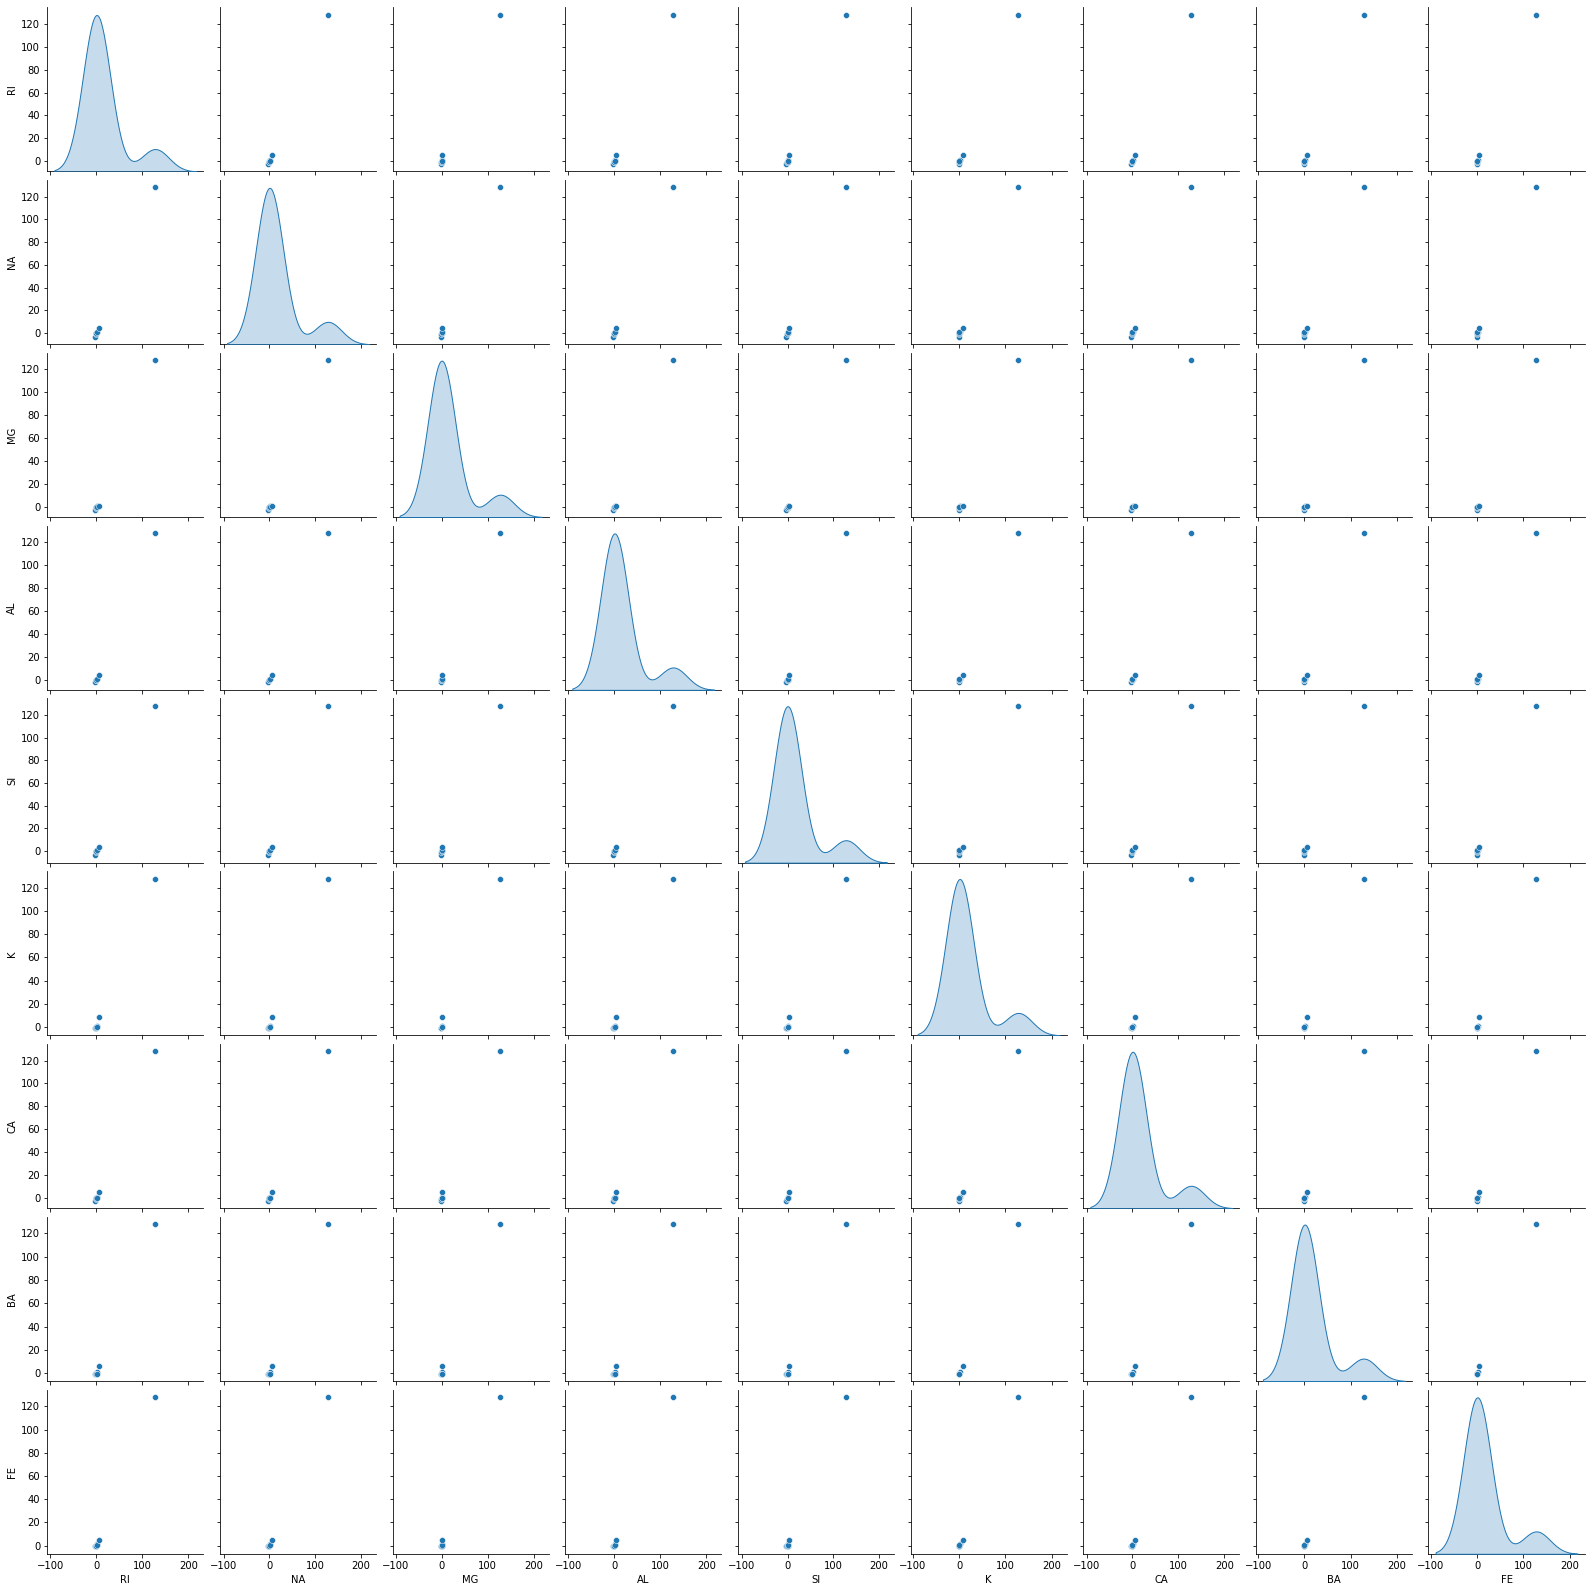

train_stats:
     count      mean       std       min       25%       50%       75%  \
RI  128.0 -0.001476  1.090521 -2.375945 -0.630723 -0.235579  0.259175   
NA  128.0  0.059269  1.079292 -3.279254 -0.628029 -0.003491  0.648601   
MG  128.0 -0.093432  1.048903 -1.861147 -0.848950  0.520288  0.622547   
AL  128.0  0.108470  1.055418 -2.313192 -0.430442 -0.089944  0.500919   
SI  128.0 -0.041755  1.092867 -3.667872 -0.556371  0.153723  0.557185   
K   128.0  0.090043  1.245965 -0.762132 -0.547471  0.081178  0.161676   
CA  128.0 -0.039696  1.110213 -2.478273 -0.524864 -0.282445  0.096994   
BA  128.0  0.125762  1.193459 -0.352051 -0.352051 -0.352051 -0.352051   
FE  128.0 -0.034252  0.996926 -0.585079 -0.585079 -0.585079  0.338579   

         max  
RI  5.125215  
NA  4.864232  
MG  0.891195  
AL  4.116199  
SI  3.562172  
K   8.759606  
CA  5.082401  
BA  5.983182  
FE  4.648981  


In [142]:
# Gráfico de Relações
train_stats = x_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind='kde')
plt.show()
train_stats = train_stats.transpose()
print(f'train_stats:\r\n {train_stats}')

########################################################################################################################
Accuracy Train: 0.609375
Accuracy Valid: 0.5348837209302325
Accuracy Test: 0.3953488372093023


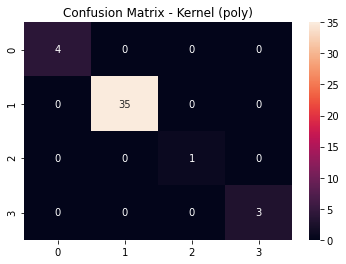

Accuracy Train: 0.8984375
Accuracy Valid: 0.6511627906976745
Accuracy Test: 0.5348837209302325


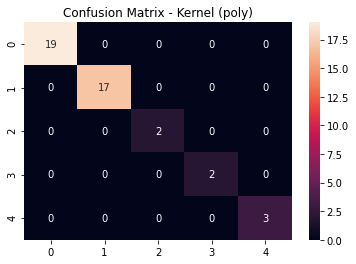

########################################################################################################################
Accuracy Train: 0.8046875
Accuracy Valid: 0.7441860465116279
Accuracy Test: 0.7209302325581395


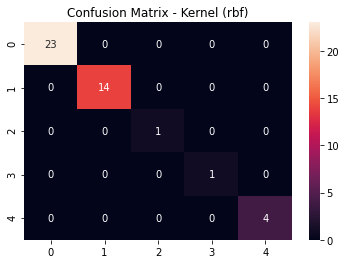

Accuracy Train: 0.9140625
Accuracy Valid: 0.7674418604651163
Accuracy Test: 0.7209302325581395


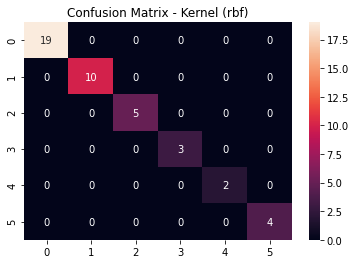

########################################################################################################################
Accuracy Train: 0.5703125
Accuracy Valid: 0.46511627906976744
Accuracy Test: 0.5581395348837209


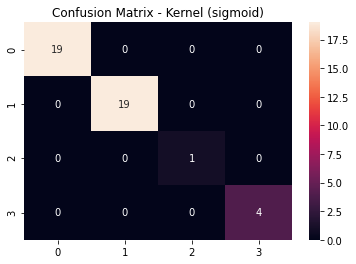

Accuracy Train: 0.7109375
Accuracy Valid: 0.6046511627906976
Accuracy Test: 0.6046511627906976


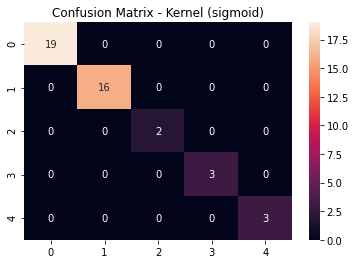

########################################################################################################################
Accuracy Train: 0.765625
Accuracy Valid: 0.6511627906976745
Accuracy Test: 0.627906976744186


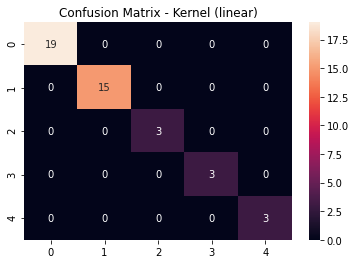

Accuracy Train: 0.796875
Accuracy Valid: 0.7209302325581395
Accuracy Test: 0.6511627906976745


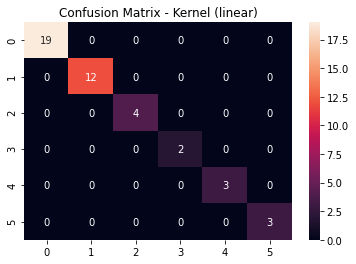

In [143]:
# Treinando Modelo
def smv_model_run_kernel(kernel, C=1.0, gamma='scale'):
    # Definindo o modo de funcionamento do modelo
    model = svm.SVC(
        kernel=kernel, # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
        C=C, # Termo de regularização
        gamma=gamma        
    )

    # Inserindo os dados de treinamento no modelo
    model.fit(x_train, y_train)

    # -------------------------------------------------------------------------
    # Avaliando a precisão dos conjuntos aplicados ao modelo

    # Precisão da Predição do modelo com base nos dados de train
    y_pred = model.predict(x_train)
    acc_train = metrics.accuracy_score(y_train, y_pred)
    print(f"Accuracy Train: {acc_train}")

    # Precisão da Predição do modelo com base nos dados de valid
    y_pred = model.predict(x_valid)
    acc_valid = metrics.accuracy_score(y_valid, y_pred)    
    print(f"Accuracy Valid: {acc_valid}")

    # Precisão da Predição do modelo com base nos dados de test
    y_pred = model.predict(x_test)
    acc_test = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy Test: {acc_test}")

    # Exibindo a matriz de confusão
    ax = plt.subplot()
    ax.set_title(f"Confusion Matrix - Kernel ({kernel})")
    predict_results = model.predict(x_test)
    cm = confusion_matrix(predict_results, predict_results)
    sns.heatmap(cm, annot=True, ax=ax)
    plt.show()

# Treinando do modelo com e sem o ajuste dos hiperparâmetros 
print("#" * 120)
smv_model_run_kernel('poly')
smv_model_run_kernel('poly', C=sel_poly['C'], gamma=sel_poly['gamma'])

print("#" * 120)
smv_model_run_kernel('rbf')
smv_model_run_kernel('rbf', C=sel_rbf['C'], gamma=sel_rbf['gamma'])

print("#" * 120)
smv_model_run_kernel('sigmoid')
smv_model_run_kernel('sigmoid', C=sel_sigmoid['C'], gamma=sel_sigmoid['gamma'])

print("#" * 120)
smv_model_run_kernel('linear')
smv_model_run_kernel('linear', C=sel_linear['C'], gamma=sel_linear['gamma'])


In [144]:
# Segunda Parte do trabalho
dt = pd.read_csv('./glass.data')
dt = dt.drop('ID', 1)
print(dt.columns)

Index(['RI', 'NA', 'MG', 'AL', 'SI', 'K', 'CA', 'BA', 'FE', 'class'], dtype='object')


count    214.000000
mean       2.780374
std        2.103739
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: class, dtype: float64


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


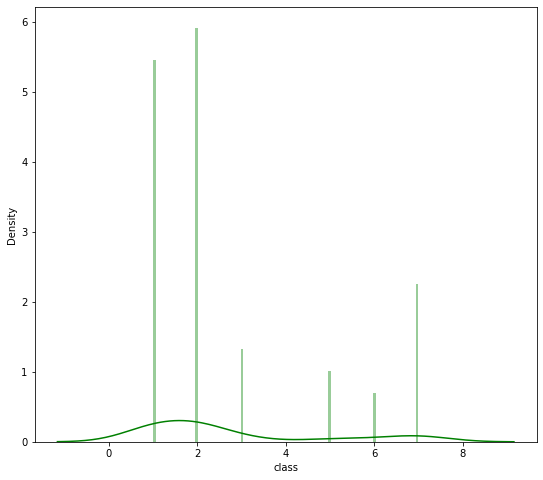

In [145]:
print(dt['class'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dt['class'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

dt['class'] = dt['class'] - 1
dt['class'] =  dt['class'].mask(dt['class'] > 3, dt['class'] - 1)

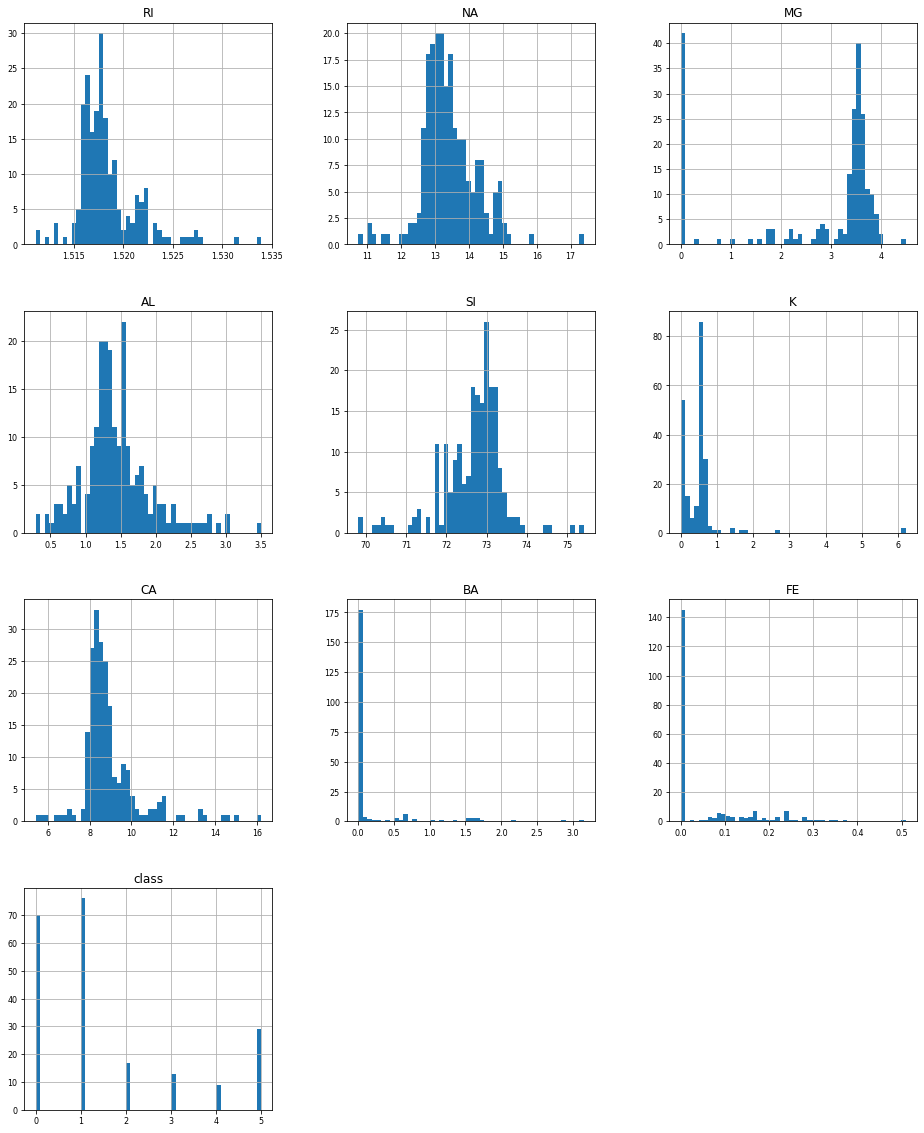

In [146]:
dt.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [147]:
df_num_corr = dt.corr()['class'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Class:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with Class:
AL    0.591198
BA    0.577676
NA    0.506424
MG   -0.728160
Name: class, dtype: float64


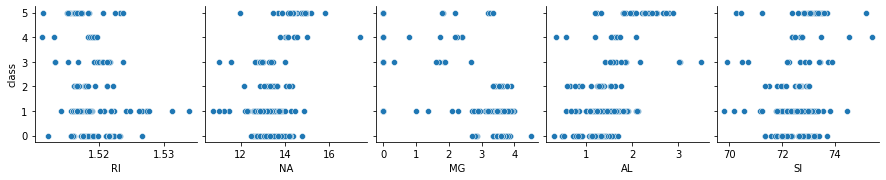

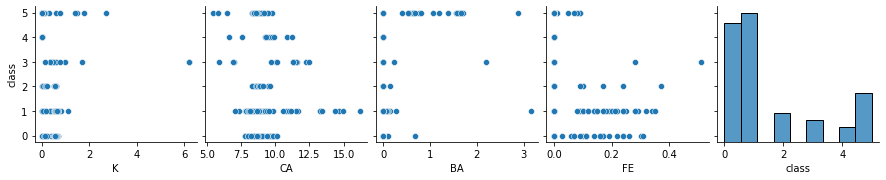

In [148]:
for i in range(0, len(dt.columns), 5):
    sns.pairplot(data=dt,
                x_vars=dt.columns[i:i+5],
                y_vars=['class'])
    plt.show()

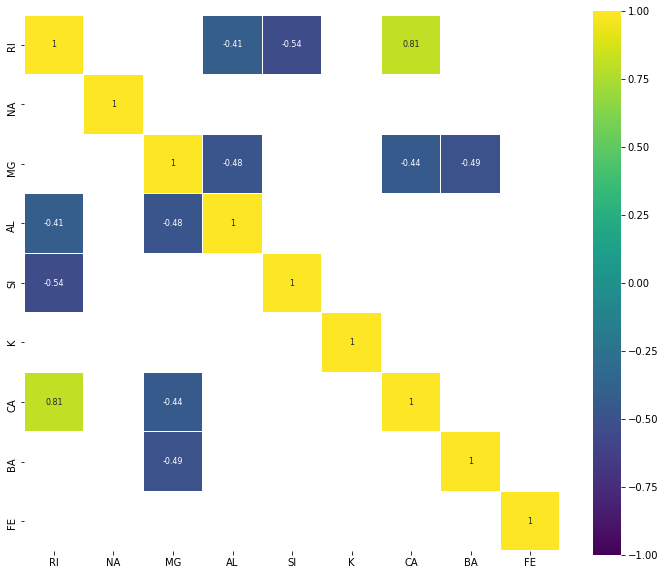

In [149]:
corr = dt.drop('class', axis=1).corr() # We already examined class correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

In [150]:
dt.describe(percentiles=[0.5])

,RI,NA,MG,AL,SI,K,CA,BA,FE,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1.542056
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,1.707648
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,5.000000


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


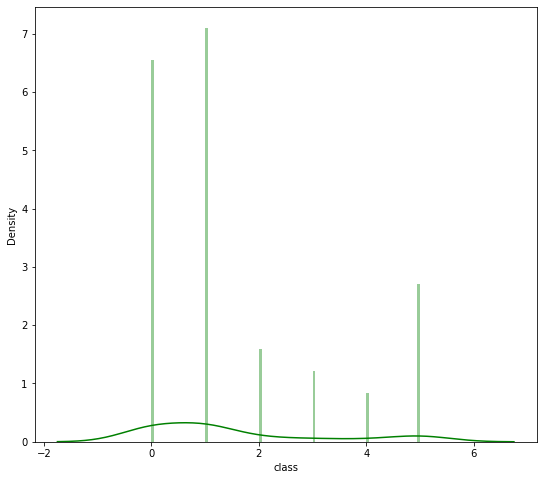

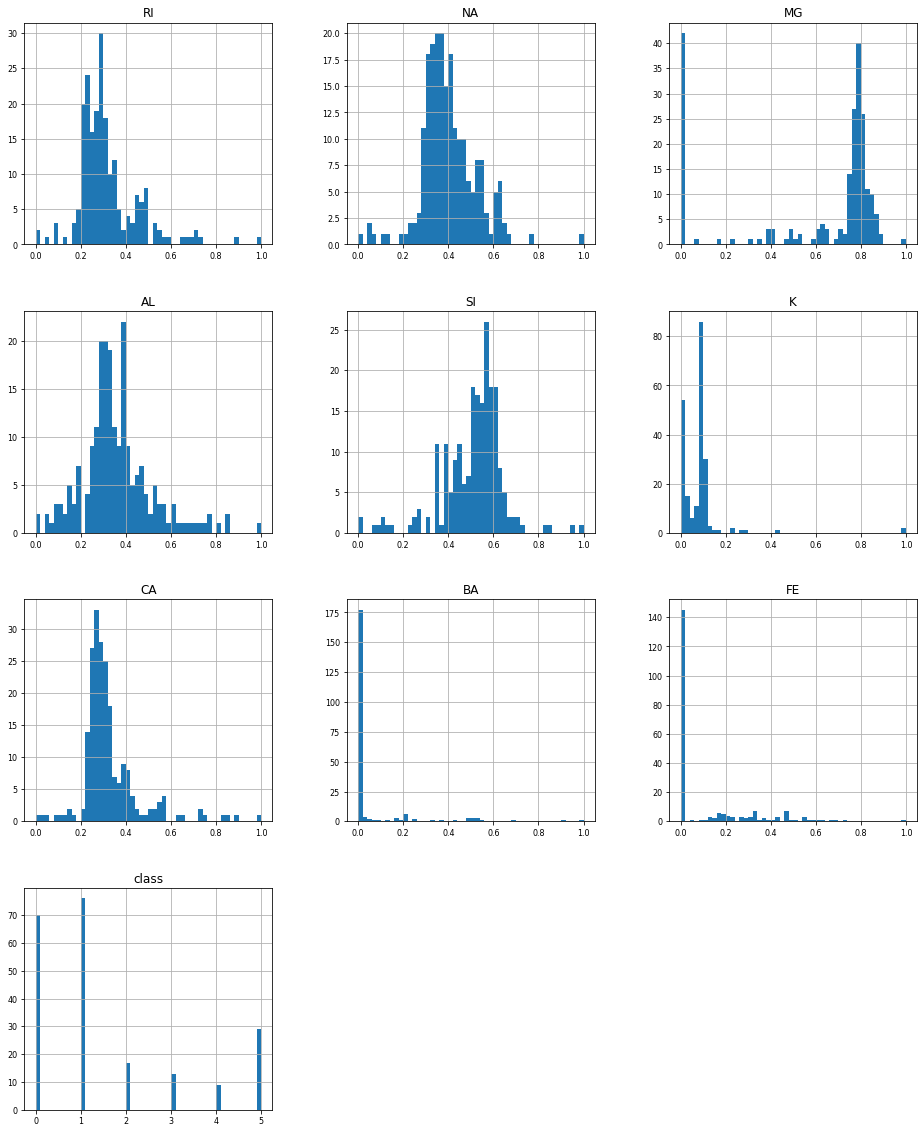

In [151]:
norm_min_max = lambda x: (x - np.min(x))/(np.max(x) - np.min(x))
dt = dt.copy()
dt.iloc[:,0:9] = dt.iloc[:,0:9].apply(norm_min_max, axis=0)
dt.describe(percentiles=[0.5])
plt.figure(figsize=(9, 8))
sns.distplot(dt['class'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()
dt.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: 

Média de acurácia para kernel poly  treino:  0.7976580935404465 validação:  0.6859477124183008
Média de acurácia para kernel (sem atributos correlacionados) poly  treino:  0.689668958492488 validação:  0.5998692810457517
Média de acurácia para kernel rbf  treino:  0.727221797810033 validação:  0.6711111111111111
Média de acurácia para kernel (sem atributos correlacionados) rbf  treino:  0.6015524997877939 validação:  0.5516339869281047
Média de acurácia para kernel sigmoid  treino:  0.44328070622188265 validação:  0.4280392156862745
Média de acurácia para kernel (sem atributos correlacionados) sigmoid  treino:  0.36114251761310584 validação:  0.3626143790849673
Média de acurácia para kernel linear  treino:  0.6591341991341991 validação:  0.6230718954248367
Média de acurácia para kernel (sem atributos correlacionados) linear  treino:  0.3879135896782956 validação:  0.3368627450980392
Acurácia do conjunto de testes: 
Poly
0.627906976744186
0.6511627906976745
Rbf
0.6511627906976745
0.6046

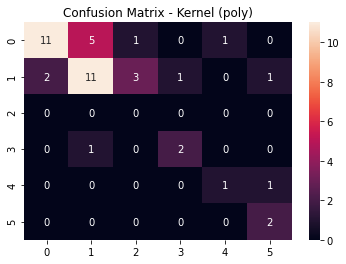

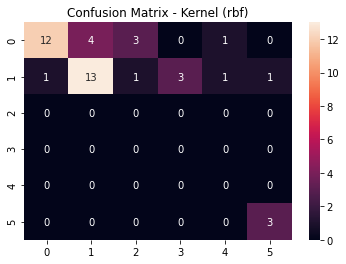

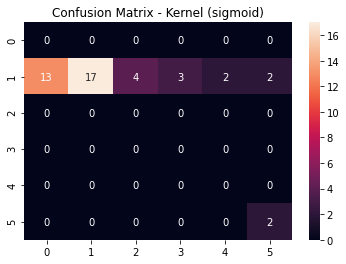

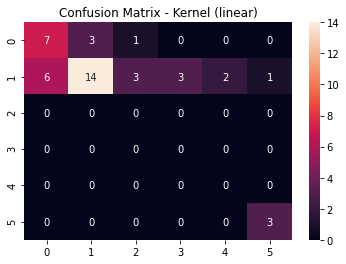

In [152]:
y = dt['class']
X = dt.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

x_test_cor = X_test.drop(columns=['AL','BA', 'NA', 'MG'])

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

scores_train = [[], [], [], []]
scores_val = [[], [], [], []]

scores_train_cor = [[], [], [], []]
scores_val_cor = [[], [], [], []]

for train_index, test_index in rskf.split(X_train, y_train):
  X_train_k, X_test_k = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train_k, y_test_k = y_train.iloc[train_index], y_train.iloc[test_index]

  x_train_k_cor, x_test_k_cor = X_train_k.drop(columns=['AL','BA', 'NA', 'MG']), X_test_k.drop(columns=['AL','BA', 'NA', 'MG'])

  model_poly = svm.SVC(
    C=1, # Termo de regularização
    kernel='poly', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )
  model_rbf = svm.SVC(
    C=1, # Termo de regularização
    kernel='rbf', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )
  model_sigmoid = svm.SVC(
    C=1, # Termo de regularização
    kernel='sigmoid', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )
  model_linear = svm.SVC(
    C=1, # Termo de regularização
    kernel='linear', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )

  model_poly_cor = svm.SVC(
    C=1, # Termo de regularização
    kernel='poly', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )
  model_rbf_cor = svm.SVC(
    C=1, # Termo de regularização
    kernel='rbf', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )
  model_sigmoid_cor = svm.SVC(
    C=1, # Termo de regularização
    kernel='sigmoid', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )
  model_linear_cor = svm.SVC(
    C=1, # Termo de regularização
    kernel='linear', # Kernels possíveis: linear, poly, rbf, sigmoid, precomputed
  )

  model_poly.fit(X_train_k, y_train_k)
  model_rbf.fit(X_train_k, y_train_k)
  model_sigmoid.fit(X_train_k, y_train_k)
  model_linear.fit(X_train_k, y_train_k)

  model_poly_cor.fit(x_train_k_cor, y_train_k)
  model_rbf_cor.fit(x_train_k_cor, y_train_k)
  model_sigmoid_cor.fit(x_train_k_cor, y_train_k)
  model_linear_cor.fit(x_train_k_cor, y_train_k)

  scores_train[0].append(model_poly.score(X_train_k, y_train_k)) 
  scores_train[1].append(model_rbf.score(X_train_k, y_train_k))
  scores_train[2].append(model_sigmoid.score(X_train_k, y_train_k))
  scores_train[3].append(model_linear.score(X_train_k, y_train_k))

  scores_train_cor[0].append(model_poly_cor.score(x_train_k_cor, y_train_k)) 
  scores_train_cor[1].append(model_rbf_cor.score(x_train_k_cor, y_train_k))
  scores_train_cor[2].append(model_sigmoid_cor.score(x_train_k_cor, y_train_k))
  scores_train_cor[3].append(model_linear_cor.score(x_train_k_cor, y_train_k))

  scores_val[0].append(model_poly.score(X_test_k, y_test_k))
  scores_val[1].append(model_rbf.score(X_test_k, y_test_k))
  scores_val[2].append(model_sigmoid.score(X_test_k, y_test_k))
  scores_val[3].append(model_linear.score(X_test_k, y_test_k))

  scores_val_cor[0].append(model_poly_cor.score(x_test_k_cor, y_test_k))
  scores_val_cor[1].append(model_rbf_cor.score(x_test_k_cor, y_test_k))
  scores_val_cor[2].append(model_sigmoid_cor.score(x_test_k_cor, y_test_k))
  scores_val_cor[3].append(model_linear_cor.score(x_test_k_cor, y_test_k))

kernels = ["poly", "rbf", "sigmoid", "linear"]
models = [model_poly, model_rbf, model_sigmoid, model_linear]

for i in range(4):
  print("Média de acurácia para kernel", kernels[i], " treino: ", np.mean(scores_train[i]), "validação: ", np.mean(scores_val[i]))
  print("Média de acurácia para kernel (sem atributos correlacionados)", kernels[i], " treino: ", np.mean(scores_train_cor[i]), "validação: ", np.mean(scores_val_cor[i]))

print("Acurácia do conjunto de testes: ")
print("Poly")
print(model_poly.score(X_test, y_test))
print(model_poly_cor.score(x_test_cor, y_test))

print("Rbf")
print(model_rbf.score(X_test, y_test))
print(model_rbf_cor.score(x_test_cor, y_test))


print("Sigmoid")
print(model_sigmoid.score(X_test, y_test))
print(model_sigmoid_cor.score(x_test_cor, y_test))

print("Linear")
print(model_linear.score(X_test, y_test))
print(model_linear_cor.score(x_test_cor, y_test))

i = 0
for kernel in kernels:
  ax = plt.subplot()
  ax.set_title(f"Confusion Matrix - Kernel ({kernel})")
  predict_results = models[i].predict(X_test)
  cm = confusion_matrix(predict_results, y_test)
  sns.heatmap(cm, annot=True, ax=ax)
  plt.show()
  i += 1


Média de acurácia para kernel poly  treino:  0.7976580935404465 validação:  0.6859477124183008
Média de acurácia para kernel (sem atributos correlacionados) poly  treino:  0.689668958492488 validação:  0.5998692810457517


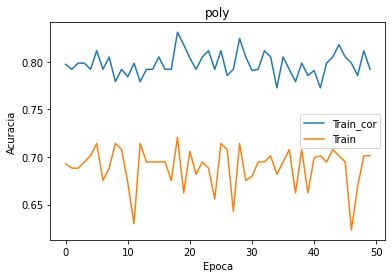

Média de acurácia para kernel rbf  treino:  0.727221797810033 validação:  0.6711111111111111
Média de acurácia para kernel (sem atributos correlacionados) rbf  treino:  0.6015524997877939 validação:  0.5516339869281047


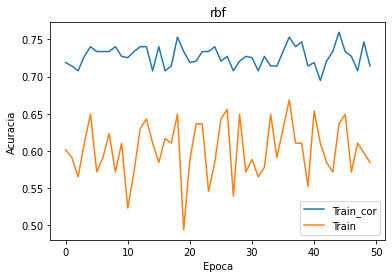

Média de acurácia para kernel sigmoid  treino:  0.44328070622188265 validação:  0.4280392156862745
Média de acurácia para kernel (sem atributos correlacionados) sigmoid  treino:  0.36114251761310584 validação:  0.3626143790849673


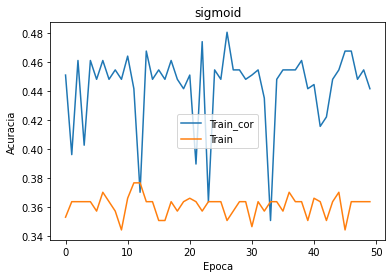

Média de acurácia para kernel linear  treino:  0.6591341991341991 validação:  0.6230718954248367
Média de acurácia para kernel (sem atributos correlacionados) linear  treino:  0.3879135896782956 validação:  0.3368627450980392


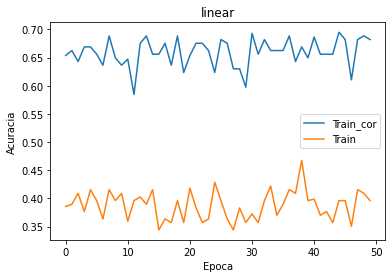

In [153]:
for i in range(4):
  print("Média de acurácia para kernel", kernels[i], " treino: ", np.mean(scores_train[i]), "validação: ", np.mean(scores_val[i]))
  print("Média de acurácia para kernel (sem atributos correlacionados)", kernels[i], " treino: ", np.mean(scores_train_cor[i]), "validação: ", np.mean(scores_val_cor[i]))
  plt.plot(range(50), scores_train[i], label = "Train_cor")
  plt.plot(range(50), scores_train_cor[i], label = "Train")
  plt.xlabel('Epoca')
  # Set the y axis label of the current axis.
  plt.ylabel('Acuracia')
  # Set a title of the current axes.
  plt.title(kernels[i])
  plt.legend()
  # Display a figure.
  plt.show()


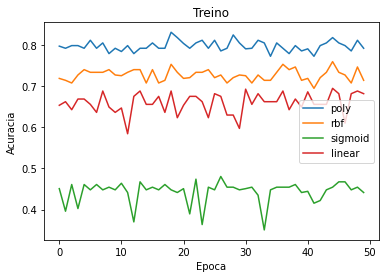

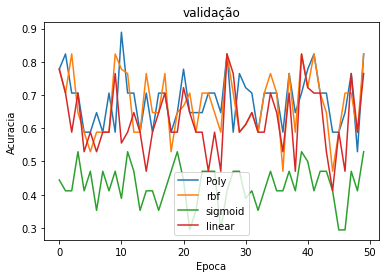

FIM


In [154]:
plt.plot(range(50), scores_train[0], label = "poly")
plt.plot(range(50), scores_train[1], label = "rbf")
plt.plot(range(50), scores_train[2], label = "sigmoid")
plt.plot(range(50), scores_train[3], label = "linear")

plt.xlabel('Epoca')
# Set the y axis label of the current axis.
plt.ylabel('Acuracia')
# Set a title of the current axes.
plt.title("Treino")
plt.legend()
# Display a figure.
plt.show()

plt.plot(range(50), scores_val[0], label = "Poly")
plt.plot(range(50), scores_val[1], label = "rbf")
plt.plot(range(50), scores_val[2], label = "sigmoid")
plt.plot(range(50), scores_val[3], label = "linear")

plt.xlabel('Epoca')
# Set the y axis label of the current axis.
plt.ylabel('Acuracia')
# Set a title of the current axes.
plt.title("validação")
plt.legend()
# Display a figure.
plt.show()

print("FIM")